<a href="https://colab.research.google.com/github/JoelFred20/oibsip_taskno2/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries:**

Start by importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load Unemployment Data:**

Load the given datasent.

In [3]:
unemployment_data = pd.read_csv('/content/Unemployment in India.csv')

**3. Explore and Clean Data:**

Explore the dataset to understand its structure and clean it if necessary.

In [ ]:
# Display basic information about the dataset
print(unemployment_data.info())

# Display the first few rows of the dataset
print(unemployment_data.head())

# Check for missing values
print("Missing Values:")
print(unemployment_data.isnull().sum())

# Fill missing values with the mean for all columns
unemployment_data.fillna(unemployment_data.mean(), inplace=True)

# Display updated information after filling missing values
print("Updated Information:")
print(unemployment_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly

<ipython-input-7-ed56c74f7116>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  unemployment_data.fillna(unemployment_data.mean(), inplace=True)


**4. Data Visualization:**

Visualize the unemployment rate trends over time.

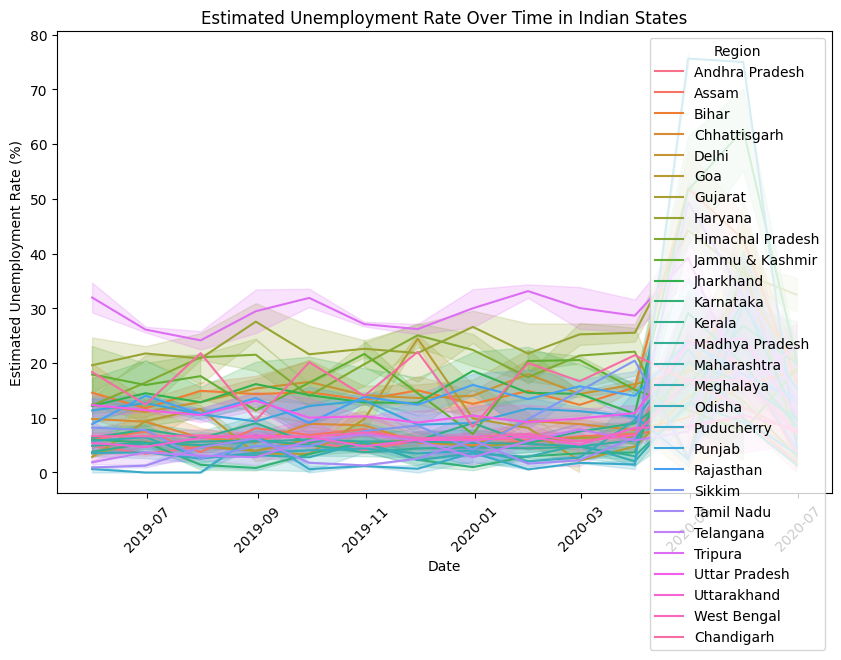

In [ ]:
# Replace spaces with underscores in column names
unemployment_data.columns = unemployment_data.columns.str.replace(' ', '_')

# Convert 'Date' column to datetime type if it exists
if '_Date' in unemployment_data.columns:
    unemployment_data['_Date'] = pd.to_datetime(unemployment_data['_Date'])

    # Line plot of unemployment rate over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='_Date', y='_Estimated_Unemployment_Rate_(%)', hue='Region', data=unemployment_data)
    plt.title('Estimated Unemployment Rate Over Time in Indian States')
    plt.xlabel('Date')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Region', loc='upper right')
    plt.show()
else:
    print("Error: 'Date' column not found in the dataset.")

**5. Statistical Analysis:**

Perform any necessary statistical analysis, such as calculating the mean, median, or standard deviation of the unemployment rate.

count    768.000000
mean      11.787946
std       10.523784
min        0.000000
25%        4.720000
50%        9.005000
75%       15.472500
max       76.740000
Name: _Estimated_Unemployment_Rate_(%), dtype: float64


<ipython-input-9-066331fc1dd0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = unemployment_data.corr()


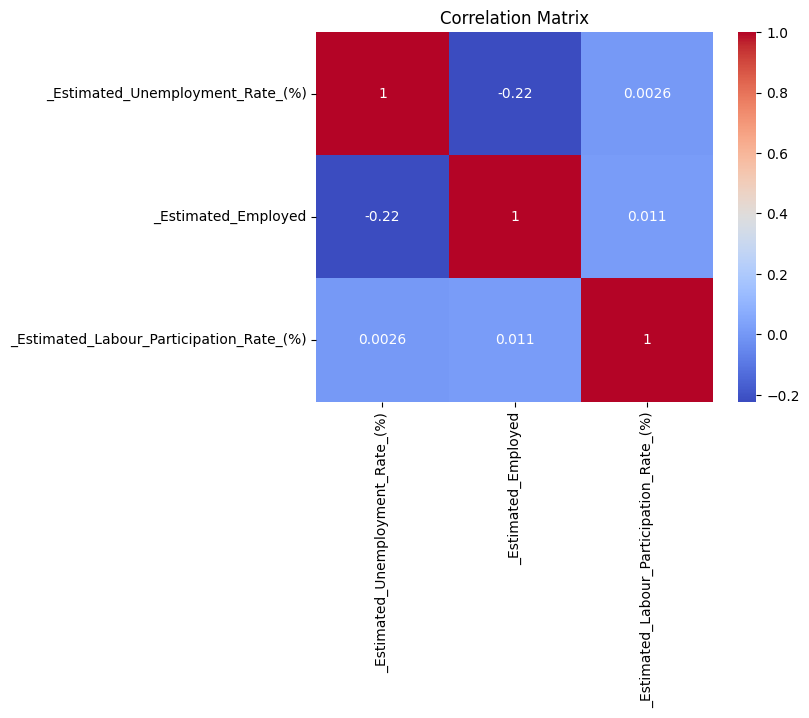

In [ ]:
# Summary statistics
print(unemployment_data['_Estimated_Unemployment_Rate_(%)'].describe())

# Correlation with other variables if available
correlation_matrix = unemployment_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**6. Impact of COVID-19:**

If your dataset includes the COVID-19 period, analyze the impact of the pandemic on the unemployment rate.

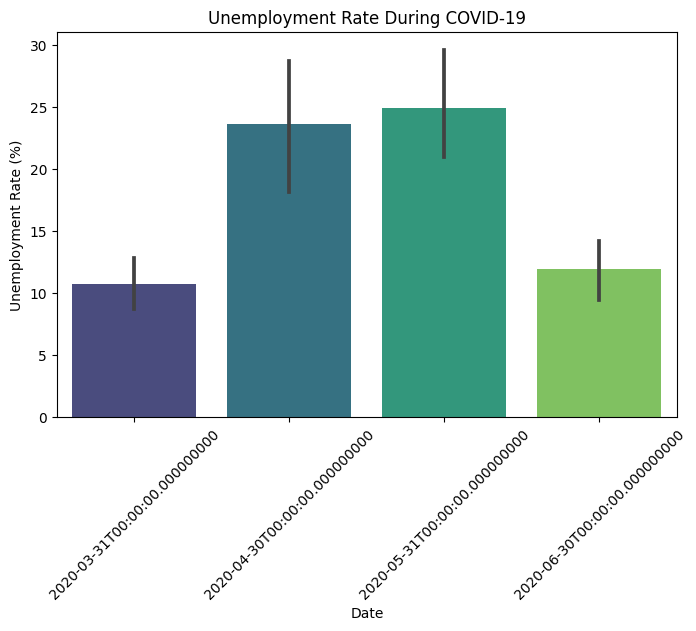

In [ ]:
# Filter data for COVID-19 period
covid_data = unemployment_data[unemployment_data['_Date'] >= '2020-03-01']

# Bar plot of unemployment rate during COVID-19
plt.figure(figsize=(8, 5))
sns.barplot(x='_Date', y='_Estimated_Unemployment_Rate_(%)', data=covid_data, palette='viridis')
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

### **Predictive Modeling:**

If you have enough data, you can build predictive models to forecast future unemployment rates.



*   **Linear Regression**








Mean Squared Error: 61.75753416098786


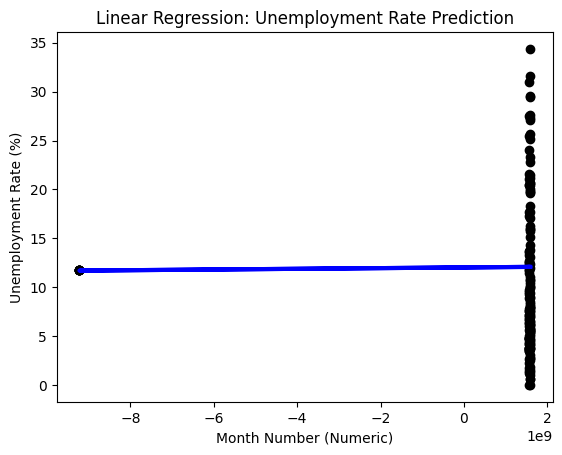

In [ ]:
# Example: Linear regression for forecasting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert 'Date' to numerical format (timestamp)
unemployment_data['_Date_numeric'] = unemployment_data['_Date'].astype(int) // 10**9

# Assume '_Date_numeric' as a feature indicating the month
X = unemployment_data[['_Date_numeric']]
y = unemployment_data['_Estimated_Unemployment_Rate_(%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Unemployment Rate Prediction')
plt.xlabel('Month Number (Numeric)')
plt.ylabel('Unemployment Rate (%)')
plt.show()


*   **Random Forest Regression**

Mean Squared Error: 62.74635236739804


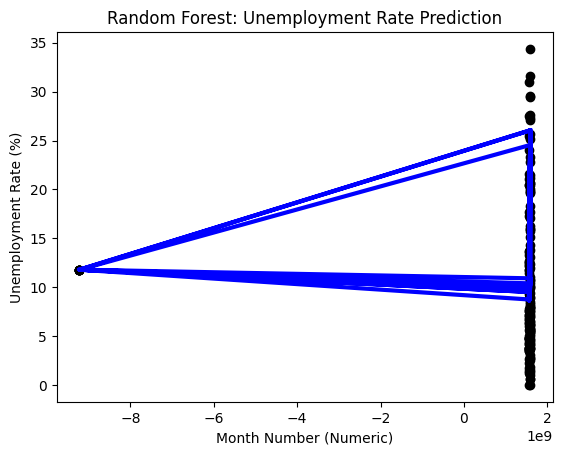

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Random Forest: Unemployment Rate Prediction')
plt.xlabel('Month Number (Numeric)')
plt.ylabel('Unemployment Rate (%)')
plt.show()




*   **Decision Tree**




Mean Squared Error: 62.61311176212332


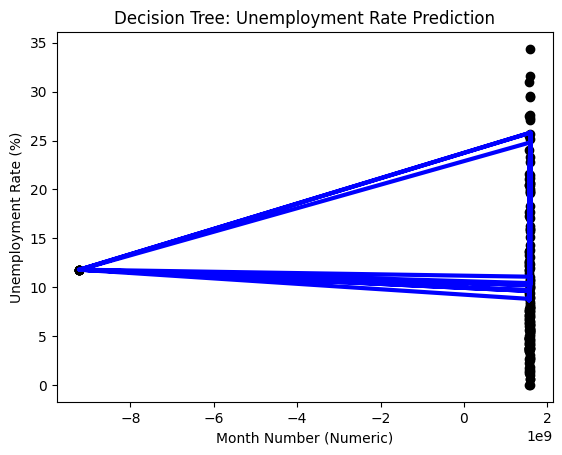

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Decision Tree: Unemployment Rate Prediction')
plt.xlabel('Month Number (Numeric)')
plt.ylabel('Unemployment Rate (%)')
plt.show()



*   **Support Vector Machine**



Mean Squared Error: 63.927299940527305


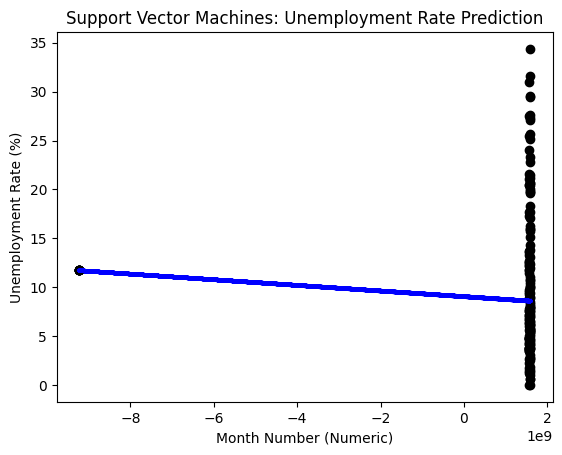

In [ ]:
# Support Vector Machines
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Support Vector Machines: Unemployment Rate Prediction')
plt.xlabel('Month Number (Numeric)')
plt.ylabel('Unemployment Rate (%)')
plt.show()
